# Unit 2 Lesson 4 Challenge: make your own regression model

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn import preprocessing
import math
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
fbi_data = pd.read_csv('offenses_known_to_law_enforcement1.csv')

### Exploring the data

In [3]:
fbi_data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
fbi_data.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


### Data Cleaning

In [5]:
fbi_data = fbi_data.drop(['Rape\n(revised\ndefinition)1'], axis =1)

In [6]:
fbi_data.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'PropCrime', 'Burglary', 'Larceny', 'AutoTheft', 'Arson']

In [7]:
fbi_data = fbi_data.fillna(0)

In [8]:
# Need to convert the column's data from strings
fbi_data['Murder'] = fbi_data['Murder'].astype(int)
fbi_data['Arson'] = fbi_data['Arson'].astype(int)
fbi_data['Robbery'] = fbi_data['Robbery'].str.replace(',', '')
fbi_data['Population'] = fbi_data['Population'].str.replace(',', '')
fbi_data['Robbery'] = fbi_data['Robbery'].astype(int)
fbi_data['Population'] = fbi_data['Population'].astype(int)
fbi_data['PropCrime'] = fbi_data['PropCrime'].str.replace(',', '')
fbi_data['Larceny'] = fbi_data['Larceny'].str.replace(',', '')
fbi_data['AutoTheft'] = fbi_data['AutoTheft'].str.replace(',', '')
fbi_data['Burglary'] = fbi_data['Burglary'].str.replace(',', '')
fbi_data['PropCrime'] = fbi_data['PropCrime'].astype(int)

###  Creating a new feature and fitting the model

In [9]:
new_fbi_data_col = ["Population", "Murder", "Robbery", "PropCrime", "Arson"]
new_fbi_data = fbi_data[new_fbi_data_col]
new_data = new_fbi_data[(np.abs(stats.zscore(new_fbi_data)) <= 1.5).all(axis=1)]

In [10]:
new_data['Propertycrime'] = np.log(fbi_data.Population) + fbi_data.Murder + fbi_data.Arson + fbi_data.Robbery

C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
regr = linear_model.LinearRegression()
Y = new_data['PropCrime']
X = new_data['Propertycrime'].values.reshape(-1, 1)
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 10.1225013]

Intercept: 
 102.825515923

R-squared:
0.543463845811


In [13]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = new_data['PropCrime']
predicted = predicted.astype(float)
actual = actual.astype(float)
# Calculate the error, also called the residual.
residual = actual - predicted

### Verifiying the model meets Multivariable criteria

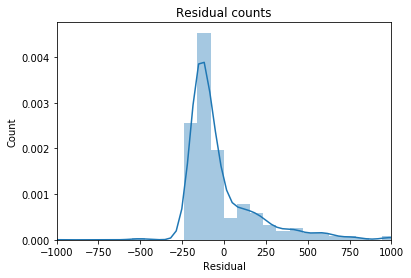

In [14]:
sns.distplot(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.xlim(-1000, 1000)
plt.show()

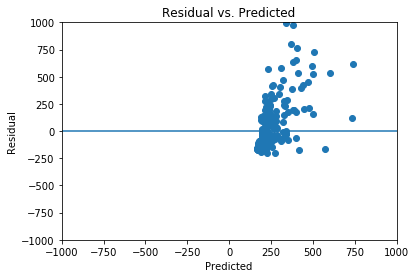

In [15]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
plt.show()